In [1]:
%matplotlib inline
import io
import os 
from os import path
import base64
from PIL import Image, ImageDraw
import glob
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def drawImage(file):
    image = ''
    im = []
    if type(file).__name__ == 'str':
        image = Image.open(file).convert("L")
    else:
        image = file
        
    if type(file).__name__ == 'ndarray':
        im = file
    else:
        im = np.array(image, dtype=np.uint8)
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(im)
    plt.show()
    
    return ax



In [3]:
img_path = 'data/instructors/'
filespatttern = '*'
pathPattern = path.join(img_path,filespatttern)
listFiles = glob.glob(pathPattern)

In [4]:
S= np.array([ 
    (np.reshape(
        np.array(Image.open(image).convert("L").resize((300,300))
                 )
        , 300*300,'F')
        ) 
    for image in listFiles])


In [5]:
S.shape #Fotosx Features  Matlab (N1*N2)x M

(24, 90000)

### Computing eigenfaces

1. Normalizing images

In [6]:
ustd = 100
um=80
S= np.array([ (imagep-np.mean(imagep))*ustd/(np.std(imagep)+um)  for imagep in S]) 

1.1 Drawing normilized images

In [7]:
#[drawImage(np.reshape(nImage,(300,300), 'F')) for nImage in S]


 2 Compute Mean face from all the normalized faces.

In [8]:
m = np.mean(S,axis=0 ,dtype=np.uint8) #Calcula por columna
imfMentT = np.transpose(np.reshape(m, (300,300),'F'))

3 Draw mean face

In [9]:
#[drawImage((np.reshape(nImage,(300,300), 'F'))-imgMenT ) for nImage in S]
#9000x14 Matlab

4 Compute eigenfaces

In [10]:
dbx=np.array(S)  # en matlab es 9000x14
A=np.array(S) 

In [11]:
#Covariance matrix C=A'A, L=AA'
L = np.dot(A,A.transpose())  # 14x14

In [12]:
dd, vv = np.linalg.eig(L)

In [13]:
seival = sorted([(i,j) for i,j in enumerate(dd)],key=lambda l: l[1])
d = np.array([val for idx,val in seival])
v=np.array([vv[idx] for idx,val in seival])

Normalization of eigenvectors

In [14]:
v = np.array( [x/np.linalg.norm(x) for x in v])

eigenvectors of C matrix

In [15]:
dSq = [np.sqrt(val) for  val in d]

In [16]:
dbx.transpose().shape,v.shape

((90000, 24), (24, 24))

In [17]:
u = [dbx.transpose().dot(v[idx])/np.sqrt(d[idx]) for idx in range(v.shape[0])]

Normalization of eigenvector of the C matrix

In [18]:
u = np.array([val/np.linalg.norm(val) for val in u])

In [19]:
#[drawImage((np.reshape(nImage,(300,300), 'F'))) for nImage in u]

Classifying New Faces

In [20]:
#omega will store this information for the training set.
omega=[]
for h in range(dbx.shape[0]):
    WW = []
    for i in range(u.shape[0]):
        t=u[i].transpose()
        WeightOfImage = t.dot(dbx[h].transpose())
        WW.append(WeightOfImage)
    omega.append(WW)
omega =np.array(omega)

New image

In [21]:
ima1 = '/Users/sharop/Desktop/ImagenesOriginales/foto3.png'
imVect = np.reshape(np.array(Image.open(ima1).convert("L").resize((300,300))), 300*300,'F')

In [22]:
ustd = 100
um=80
NormImage=((imVect-np.mean(imVect))*ustd)/(np.std(imVect)+um)
Difference = NormImage-m;

In [23]:
p=[]
for i in range(u.shape[0]):
    pare = NormImage.dot(u[i])
    p.append(pare)
p=np.matrix(p).transpose() #14x1

In [24]:
m=np.matrix(m.transpose()).transpose() #90000x1
u=u.transpose() #90000x14

In [25]:
#m is the mean image, u is the eigenvector
ReshapedImage = m + u.dot(p)

In [26]:
#drawImage((np.reshape(ReshapedImage,(300,300), 'F') ))

In [27]:
InImWeight = []
for i in range(u.shape[1]):
    t=u[:,i].transpose()
    WeightOfInputImage = t.dot(Difference.transpose())
    InImWeight.append(WeightOfInputImage)

InImWeight = np.array(InImWeight)

In [28]:
#Find distance
e=[]
for i in range(omega.shape[0]):
    q= omega[i]
    DiffWeight = InImWeight -q
    mag = np.linalg.norm(DiffWeight)
    e.append(mag)

In [29]:
idx, dist = min(enumerate(e),key=lambda x: x[1])

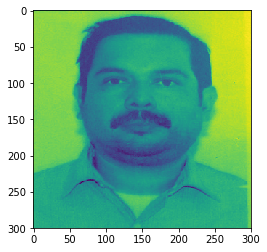

In [30]:
drawImage((np.reshape(S[idx],(300,300), 'F')) )

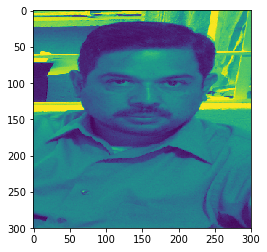

In [31]:
drawImage((np.reshape(imVect,(300,300), 'F')) )